In [1]:
from popstar import synthetic, evolution, atmospheres, reddening, ifmr
from popstar.imf import imf, multiplicity
import os, sys, math
import numpy as np
from gcwork import orbits
from astropy.table import Table, Column, MaskedColumn
import matplotlib.pyplot as plt
from astropy.constants import G
from astropy import units as u
from copy import deepcopy
from random import choice

sys.path.insert(1, '/u/abrams/code/multiplicity')
import orbits as binary_orbits

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))


First we must generate the isochrone which takes a few minutes if it has not been done before. This is the same as without resolved binaries

In [2]:
# Fetch isochrone
logAge = 6.70 # Age in log(years)
AKs = 1.0 # Ks filter extinction in mags
dist = 4000 # distance in parsecs
metallicity = 0 # metallicity in [M/H]
atm_func = atmospheres.get_merged_atmosphere
evo_merged = evolution.MISTv1()
redlaw = reddening.RedLawCardelli(3.1) # Rv = 3.1
filt_list = ['nirc2,J', 'nirc2,Kp']

iso_dir = 'iso_merged_r1/'

if not os.path.exists(iso_dir):
        os.mkdir(iso_dir)

iso_merged = synthetic.IsochronePhot(logAge, AKs, dist, metallicity=metallicity,
                                 evo_model=evo_merged, atm_func=atm_func,
                                 filters=filt_list, red_law=redlaw,
                                 iso_dir=iso_dir, mass_sampling=3)

Next we make the cluster specifiying the MultiplicityResolvedDK multiplicity object and the ResolvedCluster_ResolvedMult resolved cluster object

In [3]:
# Now we can make the cluster. 
clust_mtot = 10**3.
clust_multiplicity = multiplicity.MultiplicityResolvedDK()

# Multiplicity is defined in the IMF object
clust_imf_Mult = imf.Kroupa_2001(multiplicity=clust_multiplicity)

In [4]:
# Make clusters
clust_Mult = synthetic.ResolvedCluster_ResolvedMult(iso_merged, clust_imf_Mult, clust_mtot)

clust_Mult_ss = clust_Mult.star_systems

Now we can add the random positions of the primary stars and the calculated positions of the companions

In [5]:
clust_Mult_ss_pos = binary_orbits.add_positions(clust_Mult_ss)
clust_Mult.companions_pos = binary_orbits.add_mult_positions(clust_Mult.companions, clust_Mult_ss_pos, logAge)

Next we can display the projected cluster where blue are the primary objects, orange are the secondary objects, and grey lines connect secondary objects with their primary one

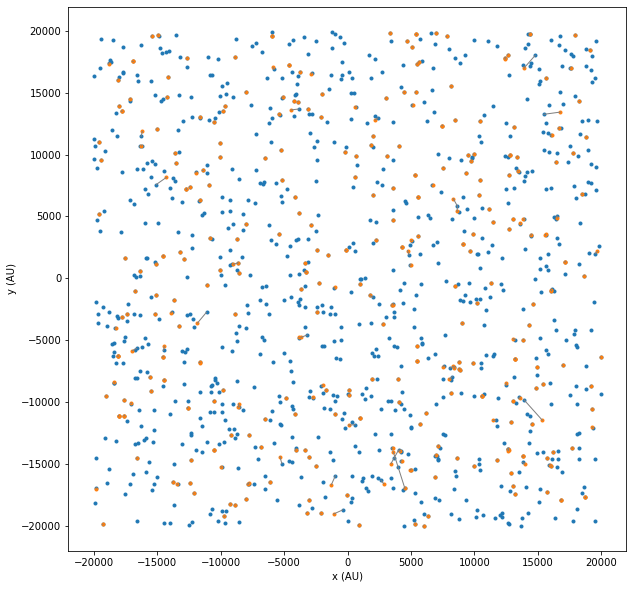

In [6]:
binary_orbits.plot_projected_cluster(clust_Mult_ss_pos, clust_Mult.companions_pos)

Finally we can plot a random orbit with the primary object is at (0,0) of a companion where the final position is marked with a star. A specific system can be ploted by specifying system = index_number in the function

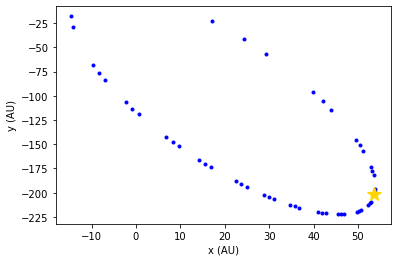

In [7]:
binary_orbits.plot_companion_orbit(clust_Mult_ss_pos, clust_Mult.companions_pos, logAge)